# K-NN Algorithm With Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
df.info()
print('---------------------------------')
df.isna().sum()
print('---------------------------------')
df.head()
print('---------------------------------')
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
---------------------------------
---------------------------------
---------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# extracting x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


# Applying PCA 

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.21254053 0.11820708]


In [7]:
print(x)

[[ 6.24110729e-01  2.32127028e+00]
 [-4.55987975e-01 -9.57350982e-01]
 [-1.82880491e+00  4.28847737e-02]
 [-1.71600605e+00 -4.95337323e-01]
 [-3.71356421e-01  3.01156175e-01]
 [-6.48867460e-01 -3.82882350e-01]
 [-7.26534041e-02  1.46021954e+00]
 [-1.90592574e+00 -1.15199470e+00]
 [-9.05732769e-01  1.17802505e+00]
 [-1.42452084e+00  6.00440468e-02]
 [-8.29249247e-01 -4.31111662e-01]
 [-1.76837052e+00  6.66082010e-01]
 [-1.73039364e+00 -3.62122452e-01]
 [ 4.78579542e-01 -3.66100880e-01]
 [-1.13904999e+00  3.31505033e+00]
 [-1.15305728e+00  3.38842792e-02]
 [-2.05289635e+00  1.44304375e+00]
 [ 1.24660567e+00  1.56563220e+00]
 [-1.17898795e+00 -5.93288357e-01]
 [-3.87798996e-01  2.04509682e+00]
 [-1.09484581e-02 -7.39533549e-01]
 [-1.69288377e+00 -1.05478211e+00]
 [-2.03684479e+00 -9.44816640e-01]
 [ 9.35559575e-01  9.21609753e-01]
 [-1.32664177e+00 -1.31154957e+00]
 [-1.39644919e-01  2.60255695e+00]
 [-7.38694870e-01  1.29433620e+00]
 [-1.46985273e+00 -1.28905546e+00]
 [-1.44718583e-01  4

In [8]:
# splitting x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr= LinearRegression()
lr.fit(x_tr,y_tr)
y_pr = lr.predict(x_te)
print(r2_score(y_te,y_pr))

0.556410678696414


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=7)

In [13]:
# predict the output and calculate the accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(x_te)
print(np.concatenate((y_te.reshape(len(y_te),1),
                      y_pred.reshape(len(y_pred),1)),axis=1))
print(accuracy_score(y_te,y_pred))

[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]]
0.8524590163934426


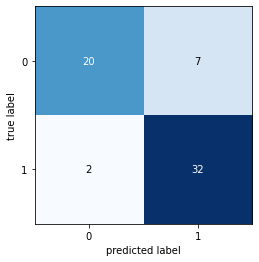

In [14]:
# plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
cm = confusion_matrix(y_te,y_pred)
plot_confusion_matrix(cm) # we give the name of the confusion matrix variable
plt.show()

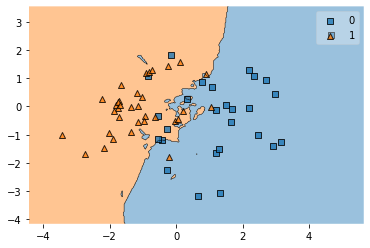

In [16]:
plot_decision_regions(X=x_te,y=y_te,clf=classifier)
plt.show()

# Inference

## 1) In this code, we first do the necessary eda and data preprocessing by checking for the missing values. The dataset contains no empty values.
## 2) We proceed with the feature scaling.
## 3) We apply pca on the dataset reducing the dimensionality to 2 features only in order to escape for the filler feature values during plotting of decision regions of confusion matrix.
## 4) After applying pca, we train the dataset using the test values by splitting the dataset into train and test datasets.
## 5) We predict the accuracy score of the knn classification model using knn classifier which is 85.25%
## 6) Then, we plot the confusion matrix for the same dataset values as above.
## 7) Atlast, we plot the decision regions for 0's and 1's.